In [11]:
%pip install numpy pandas matplotlib scipy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 55.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


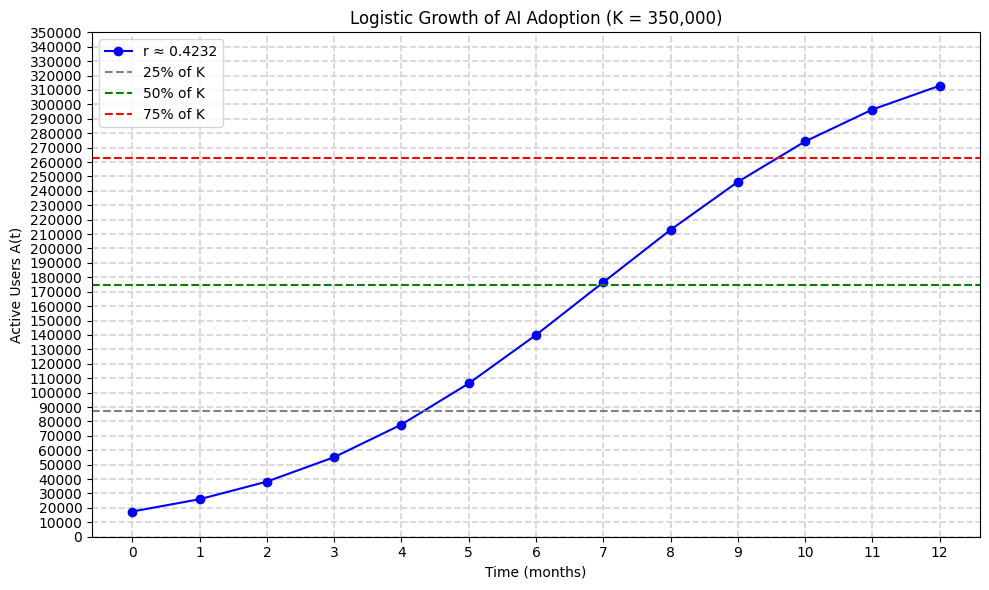

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
K = 350000               # Carrying capacity
A0 = 0.05 * K            # Initial adoption (5% of K)
A6 = 0.40 * K            # Adoption after 6 months (40% of K)
t1 = 6                   # Time interval in months

# Logistic growth function
def logistic(t, r):
    return K / (1 + ((K - A0) / A0) * np.exp(-r * t))

# Solve for r numerically
def equation(r):
    return logistic(t1, r) - A6

r_est = fsolve(equation, x0=0.1)[0]

# Simulate monthly adoption over 12 months
t = np.arange(0, 13, 1)  # Monthly steps
A_t = logistic(t, r_est)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, A_t, label=f"r ≈ {r_est:.4f}", color='blue', marker='o')
plt.axhline(0.25 * K, color='gray', linestyle='--', linewidth=1.5, label='25% of K')
plt.axhline(0.50 * K, color='green', linestyle='--', linewidth=1.5, label='50% of K')
plt.axhline(0.75 * K, color='red', linestyle='--', linewidth=1.5, label='75% of K')
plt.xticks(t)
plt.yticks(np.arange(0, K + 10000, 10000))
plt.title("Logistic Growth of AI Adoption (K = 350,000)")
plt.xlabel("Time (months)")
plt.ylabel("Active Users A(t)")
plt.grid(True, which='both', linestyle='--', linewidth=1.2, color='lightgray')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import pandas as pd

# Parameters
K = 350_000          # Carrying capacity
A0 = 17_500          # Initial adoption
A6 = 140_000         # Adoption after 6 months
t_target = 6         # Time in months

# Solve for r using the logistic growth formula
def solve_r(K, A0, A_target, t):
    ratio = (K - A0) / A0
    r = -np.log((K / A_target - 1) / ratio) / t
    return r

r = solve_r(K, A0, A6, t_target)

# Logistic growth function
def logistic(t, K, A0, r):
    return K / (1 + ((K - A0) / A0) * np.exp(-r * t))

# Generate table
months = np.arange(13)
adoption = logistic(months, K, A0, r).round().astype(int)
daily_avg = (adoption / 30).round().astype(int)

# Create DataFrame
df = pd.DataFrame({
    "Month": months,
    "Adoption A(t)": adoption,
    "Daily Average Users": daily_avg
})

# Display table
print(df.to_string(index=False))


 Month  Adoption A(t)  Daily Average Users
     0          17500                  583
     1          26033                  868
     2          38248                 1275
     3          55218                 1841
     4          77837                 2595
     5         106377                 3546
     6         140000                 4667
     7         176548                 5885
     8         212962                 7099
     9         246225                 8208
    10         274285                 9143
    11         296408                 9880
    12         312941                10431


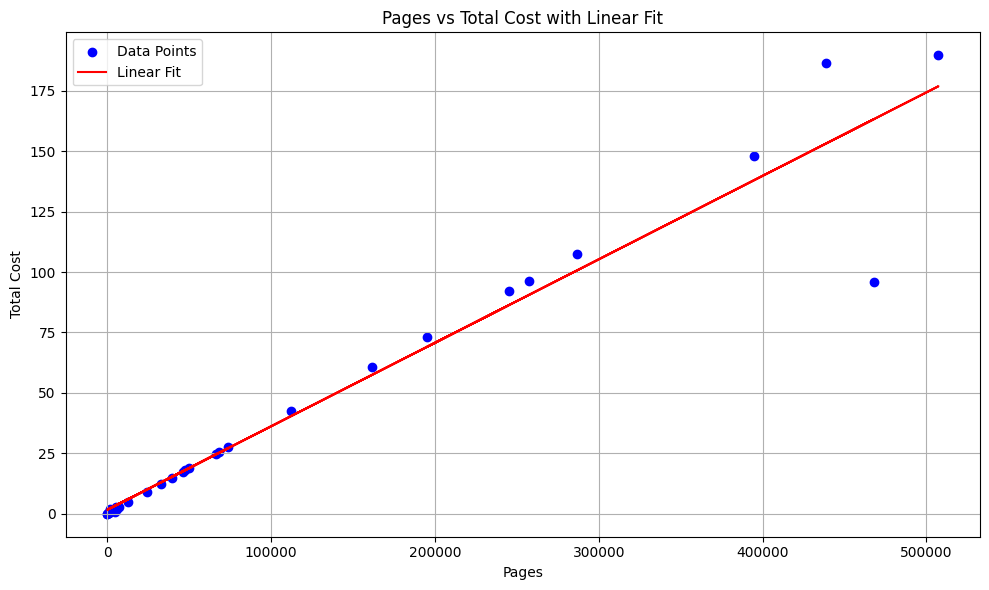

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
pages = [12760, 5880, 2, 0, 7340, 33130, 50130, 66310, 39430, 934, 1080, 24020,
         73980, 47540, 46270, 68060, 610, 4470, 111920, 161740, 507340, 194930,
         244970, 1610, 5300, 257510, 286590, 395070, 467940, 438770]
costs = [4.79, 2.19, 0.02, 0, 2.75, 12.38, 18.79, 24.86, 14.7, 0.33, 0.57, 8.98,
         27.71, 17.91, 17.21, 25.66, 0.26, 0.8, 42.62, 60.72, 189.64, 73.08,
         92.12, 2.07, 2.73, 96.2, 107.65, 148.01, 95.85, 186.54]

# Fit linear model
coeffs = np.polyfit(pages, costs, 1)
fit_line = np.poly1d(coeffs)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(pages, costs, color='blue', label='Data Points')
plt.plot(pages, fit_line(pages), color='red', label='Linear Fit')
plt.xlabel('Pages')
plt.ylabel('Total Cost')
plt.title('Pages vs Total Cost with Linear Fit')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


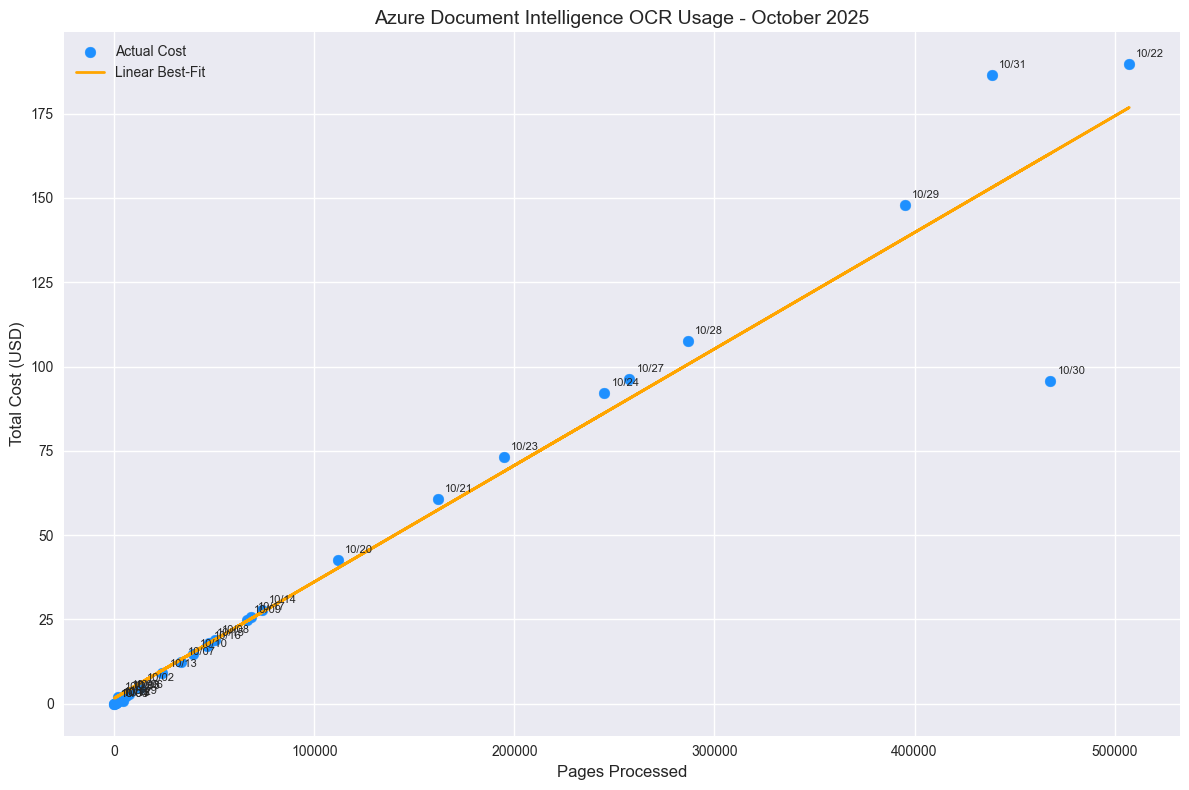

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Hardcoded data
dates = ['10/02', '10/03', '10/04', '10/05', '10/06', '10/07', '10/08', '10/09', '10/10', '10/11',
         '10/12', '10/13', '10/14', '10/15', '10/16', '10/17', '10/18', '10/19', '10/20', '10/21',
         '10/22', '10/23', '10/24', '10/25', '10/26', '10/27', '10/28', '10/29', '10/30', '10/31']
pages = [12760, 5880, 2, 0, 7340, 33130, 50130, 66310, 39430, 934,
         1080, 24020, 73980, 47540, 46270, 68060, 610, 4470, 111920, 161740,
         507340, 194930, 244970, 1610, 5300, 257510, 286590, 395070, 467940, 438770]
costs = [4.79, 2.19, 0.02, 0, 2.75, 12.38, 18.79, 24.86, 14.7, 0.33,
         0.57, 8.98, 27.71, 17.91, 17.21, 25.66, 0.26, 0.8, 42.62, 60.72,
         189.64, 73.08, 92.12, 2.07, 2.73, 96.2, 107.65, 148.01, 95.85, 186.54]

# Compute linear best-fit line
slope, intercept = np.polyfit(pages, costs, 1)
costs_fit = slope * np.array(pages) + intercept

# Plot
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pages, costs, color='dodgerblue', s=60, label='Actual Cost')
ax.plot(pages, costs_fit, color='orange', linewidth=2, label='Linear Best-Fit')

# Annotate each point with its date
for i in range(len(dates)):
    ax.annotate(dates[i],
                (pages[i], costs[i]),
                textcoords="offset points",
                xytext=(5, 5),
                ha='left',
                fontsize=8)

# Labels and title
ax.set_xlabel("Pages Processed", fontsize=12)
ax.set_ylabel("Total Cost (USD)", fontsize=12)
ax.set_title("Azure Document Intelligence OCR Usage - October 2025", fontsize=14)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

